In [1]:
import os
import pandas as pd
import numpy as np
import json

In [2]:

import pandas as pd

data_dir = "/home/janani/Documents/pivony/archive"
chunk_size = 10000  

# Create an empty DataFrame to store chunks
chunks = []

# Read the JSON file in chunks
for chunk in pd.read_json(os.path.join(data_dir, "arxiv-metadata-oai-snapshot.json"), lines=True, chunksize=chunk_size):
    chunks.append(chunk)

# Concatenate all the chunks into a single DataFrame
meta_df = pd.concat(chunks, ignore_index=True)

# Display the first few rows
meta_df.head()


,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,704.0001,Pavel Nadolsky,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",10.1103/PhysRevD.76.013009,ANL-HEP-PR-07-12,hep-ph,None,A fully differential calculation in perturba...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2008-11-26,"[[Balázs, C., ], [Berger, E. L., ], [Nadolsky,..."
1,704.0002,Louis Theran,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,None,None,None,math.CO cs.CG,http://arxiv.org/licenses/nonexclusive-distrib...,"We describe a new algorithm, the $(k,\ell)$-...","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2008-12-13,"[[Streinu, Ileana, ], [Theran, Louis, ]]"
2,704.0003,Hongjun Pan,Hongjun Pan,The evolution of the Earth-Moon system based o...,"23 pages, 3 figures",None,None,None,physics.gen-ph,None,The evolution of Earth-Moon system is descri...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2008-01-13,"[[Pan, Hongjun, ]]"
3,704.0004,David Callan,David Callan,A determinant of Stirling cycle numbers counts...,11 pages,None,None,None,math.CO,None,We show that a determinant of Stirling cycle...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2007-05-23,"[[Callan, David, ]]"
4,704.0005,Alberto Torchinsky,Wael Abu-Shammala and Alberto Torchinsky,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,None,"Illinois J. Math. 52 (2008) no.2, 681-689",None,None,math.CA math.FA,None,In this paper we show how to compute the $\L...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2013-10-15,"[[Abu-Shammala, Wael, ], [Torchinsky, Alberto, ]]"


In [3]:
# Make sure that the data loaded
meta_df.shape

(2551074, 14)

In [5]:
meta_df.head(1)

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,704.0001,Pavel Nadolsky,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",10.1103/PhysRevD.76.013009,ANL-HEP-PR-07-12,hep-ph,None,A fully differential calculation in perturba...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2008-11-26,"[[Balázs, C., ], [Berger, E. L., ], [Nadolsky,..."


In [4]:
# For the multilabel classification we use title, categories and abstract
columns = ['title', 'abstract', 'categories']
meta_dfs = meta_df[columns]

In [5]:
# Make a list of categories in the new column
meta_dfs['category'] = meta_dfs.categories.str.split(' ')
# Define main category(ies) for each article by removing subcategories 
# defined after the dot
meta_dfs['main_category'] = meta_dfs.category.apply(lambda x:[a.split('.')[0] for a in x])
meta_dfs.drop(columns=['categories','category'], inplace=True)

/tmp/ipykernel_55868/2214881752.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_dfs['category'] = meta_dfs.categories.str.split(' ')
/tmp/ipykernel_55868/2214881752.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_dfs['main_category'] = meta_dfs.category.apply(lambda x:[a.split('.')[0] for a in x])
/tmp/ipykernel_55868/2214881752.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

In [7]:
meta_dfs.head(5)

,title,abstract,main_category
0,Calculation of prompt diphoton production cros...,A fully differential calculation in perturba...,[hep-ph]
1,Sparsity-certifying Graph Decompositions,"We describe a new algorithm, the $(k,\ell)$-...","[math, cs]"
2,The evolution of the Earth-Moon system based o...,The evolution of Earth-Moon system is descri...,[physics]
3,A determinant of Stirling cycle numbers counts...,We show that a determinant of Stirling cycle...,[math]
4,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,In this paper we show how to compute the $\L...,"[math, math]"


In [8]:
# encode categories into labele columns
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
labels = mlb.fit_transform(meta_dfs.main_category)
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [9]:
# We successfully generated a category encoding for every article
len(labels)

2551074

In [10]:
# There are in total 38 categories
labels[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
df = pd.concat([meta_dfs[['abstract','title']], pd.DataFrame(labels)], axis=1)
df.columns = ['abstract','title'] + list(mlb.classes_)
df.head(4)

,abstract,title,acc-phys,adap-org,alg-geom,ao-sci,astro-ph,atom-ph,bayes-an,chao-dyn,...,patt-sol,physics,plasm-ph,q-alg,q-bio,q-fin,quant-ph,solv-int,stat,supr-con
0,A fully differential calculation in perturba...,Calculation of prompt diphoton production cros...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"We describe a new algorithm, the $(k,\ell)$-...",Sparsity-certifying Graph Decompositions,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,The evolution of Earth-Moon system is descri...,The evolution of the Earth-Moon system based o...,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,We show that a determinant of Stirling cycle...,A determinant of Stirling cycle numbers counts...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# For our task we remove the categories with small number of articles
columns = df.columns
# Find the frequencies of the articles in every category
categor_freq = df[columns[2:]].sum()/df.shape[0]
categor_freq

acc-phys    0.000019
adap-org    0.000229
alg-geom    0.000558
ao-sci      0.000007
astro-ph    0.136019
atom-ph     0.000048
bayes-an    0.000006
chao-dyn    0.000940
chem-ph     0.000098
cmp-lg      0.000350
comp-gas    0.000087
cond-mat    0.147724
cs          0.259517
dg-ga       0.000287
econ        0.004077
eess        0.035179
funct-an    0.000167
gr-qc       0.042602
hep-ex      0.021253
hep-lat     0.011018
hep-ph      0.071197
hep-th      0.065880
math        0.257428
math-ph     0.031511
mtrl-th     0.000103
nlin        0.016843
nucl-ex     0.010179
nucl-th     0.022578
patt-sol    0.000255
physics     0.102095
plasm-ph    0.000015
q-alg       0.000619
q-bio       0.018223
q-fin       0.007725
quant-ph    0.059387
solv-int    0.000554
stat        0.047773
supr-con    0.000069
dtype: float64

In [13]:
import matplotlib.pyplot as plt

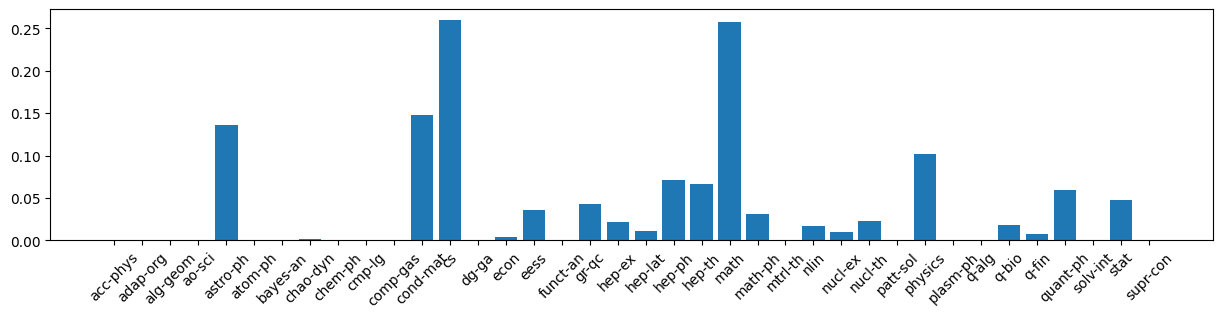

In [14]:
plt.rcParams["figure.figsize"] = (15,3)
plt.bar(categor_freq.index, categor_freq.values)
_ = plt.xticks(rotation = 45)

In [15]:
# Drop the categories with low frequencies
signif_cols = categor_freq.index[categor_freq.values>0.05]
df0 = df[['abstract', 'title']+list(signif_cols)]
# Remove articles with zeros in all the categories
df0 = df0.loc[df0[signif_cols].sum(axis=1)>0]
df0.head(4)

,abstract,title,astro-ph,cond-mat,cs,hep-ph,hep-th,math,physics,quant-ph
0,A fully differential calculation in perturba...,Calculation of prompt diphoton production cros...,0,0,0,1,0,0,0,0
1,"We describe a new algorithm, the $(k,\ell)$-...",Sparsity-certifying Graph Decompositions,0,0,1,0,0,1,0,0
2,The evolution of Earth-Moon system is descri...,The evolution of the Earth-Moon system based o...,0,0,0,0,0,0,1,0
3,We show that a determinant of Stirling cycle...,A determinant of Stirling cycle numbers counts...,0,0,0,0,0,1,0,0


In [16]:
df0.shape

(2372721, 10)

In [17]:
import os

# Define the path where the preprocessed data will be saved
save_path = os.path.join("/home/janani/Documents/pivony/archive", "arxiv-preproc-data.tsv")

# Save the dataframe as a TSV file
df0.to_csv(save_path, sep="\t", header=True, index=False)
